In [170]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
df = pd.read_csv("https://raw.githubusercontent.com/jamshid-ds/praktikum_datasets/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dataset ichida barcha bemorlar kamida 21 yoshli ayollari.
<br>
<br>
Ustunlar
<br>
<br>
Pregnancies: homilador bo'lish soni
<br>
Glucose: glyukozaga test natijasi
<br>
BloodPressure: diastolik qon bosimi (mm Hg)
<br>
SkinThickness: Triceps teri burmasining qalinligi (mm)
<br>
Insulin: 2 soatlik sarum insulini (mu U/ml)
<br>
BMI: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)
<br>
DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi
<br>
Age: Yosh (yil)
<br>
<br>
Outcome: Class (0 - diabet yo'q, 1 - diabet)


In [172]:
df.shape

(768, 9)

In [173]:
df.corrwith(df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

##It is clear from the output that "Glucose" is important to us

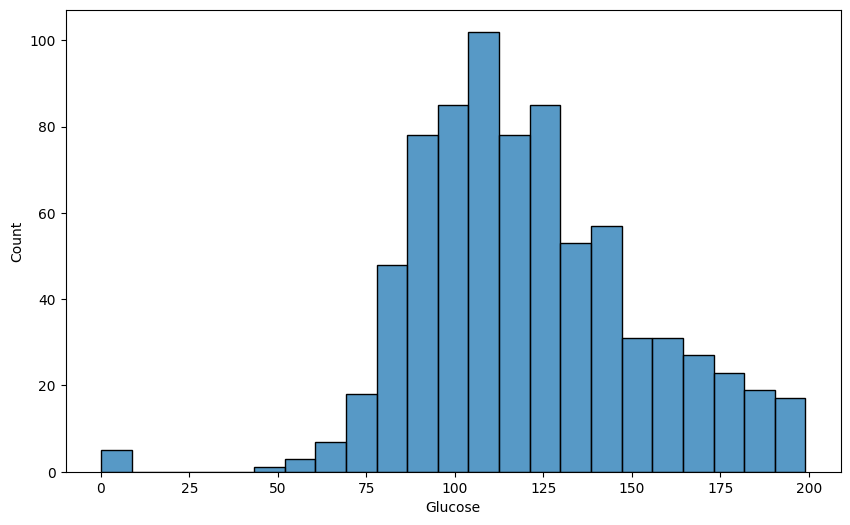

In [174]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Glucose")
plt.show()

In [175]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [176]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [177]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome']

In [178]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [179]:
from sklearn.model_selection import train_test_split
train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(X,y, test_size=0.2, random_state=2)

In [180]:
train_set_x

array([[-0.84488505,  0.09719231,  0.25303625, ..., -0.53211885,
        -1.12311057, -0.27575966],
       [-0.84488505, -0.81042491,  0.66661825, ...,  0.38169971,
        -0.72143478,  0.83038113],
       [-1.14185152, -0.84172205,  0.04624525, ...,  1.4605133 ,
        -0.37714125, -1.04154944],
       ...,
       [ 0.04601433,  0.12848945,  0.04624525, ..., -0.39250768,
         2.02989333,  1.00055664],
       [-0.25095213, -0.15318486,  0.25303625, ..., -0.72249772,
        -1.10196973, -0.78628618],
       [ 0.04601433, -0.34096773, -0.16054575, ..., -0.01174995,
        -0.00264654, -0.36084741]])

In [181]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(train_set_x, train_set_y)

KNeighborsClassifier(n_neighbors=3)

In [182]:
y_predict = knn.predict(test_set_x)

In [183]:
from sklearn.metrics import jaccard_score

jaccard_score(test_set_y, y_predict)

0.4032258064516129

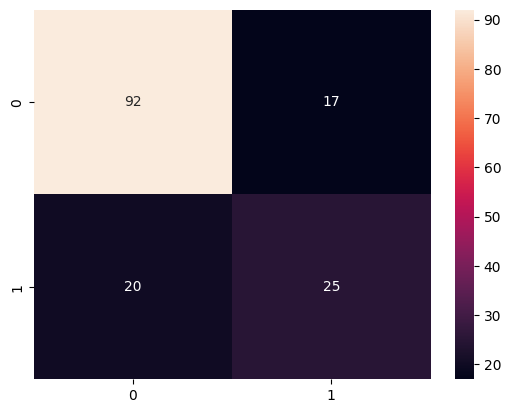

In [184]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(test_set_y, y_predict), annot=True)
plt.show()

In [185]:
confusion_matrix(test_set_y, y_predict)

array([[92, 17],
       [20, 25]])

In [186]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(test_set_y, y_predict)
recall = recall_score(test_set_y, y_predict)
f1 = f1_score(test_set_y, y_predict)
accuracy = accuracy_score(test_set_y, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.5952380952380952
recall=0.5555555555555556
f1=0.574712643678161
accuracy=0.7597402597402597


In [187]:
from sklearn.metrics import classification_report
print(classification_report(test_set_y, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       109
           1       0.60      0.56      0.57        45

    accuracy                           0.76       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.76      0.76      0.76       154



In [188]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       500
           1       0.64      0.58      0.61       268

    accuracy                           0.74       768
   macro avg       0.72      0.71      0.71       768
weighted avg       0.74      0.74      0.74       768



In [189]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [190]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 15, 18, 22, 21, 17, 16, 20, 19, 14,  9,  4, 11,  3, 12,  1,
        6,  2,  8,  5, 10,  7, 13], dtype=int32)

In [191]:
knn_gscv.best_params_

{'n_neighbors': 17}

In [192]:
knn_gscv.best_score_

0.7669892199303965

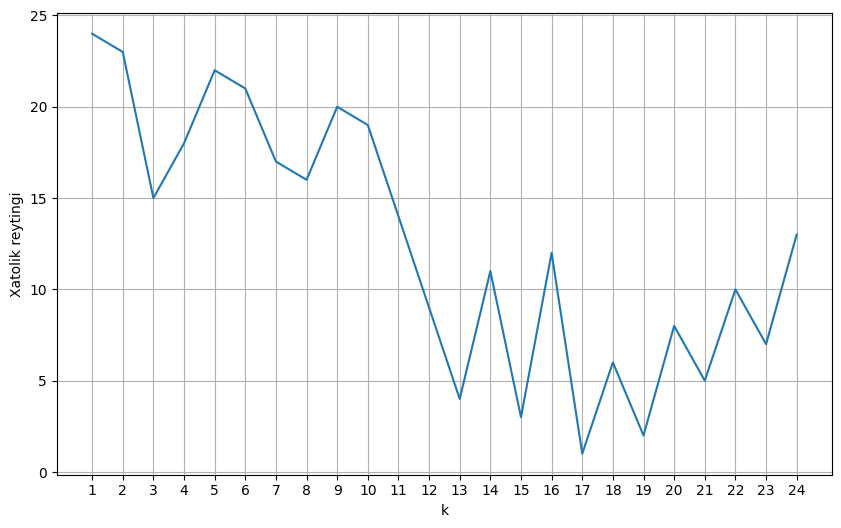

In [193]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

In [194]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(train_set_x, train_set_y)

KNeighborsClassifier(n_neighbors=17)

In [195]:
y_predict = knn.predict(test_set_x)

In [196]:
from sklearn.metrics import jaccard_score

jaccard_score(test_set_y, y_predict)

0.35

In [197]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_set_y, y_predict)

0.2532467532467532

In [198]:
print(1-mean_absolute_error(test_set_y, y_predict))

0.7467532467532467


In [230]:
def predict():
  array = np.array([[map(float,input().split())]])
  predict_func = knn.predict(array)
  if predict_func == 1:
    return 'diabet'
  else:
    return 'no diabet'

In [231]:
import joblib
joblib.dump(knn, "knn.joblib")
joblib.dump(predict, 'predict_func.joblib')

['predict_func.joblib']